# **Abstract:** 
Artificial Intelligence (AI) is becoming more popular with the advancements in technology and several organizations are already working on creating AI projects to serve their customers in a better way. However, due to its diverse effects, many people are speculating the implications AI might have on the society. Hence, it becomes necessary to gather people's opinions on this field and derive a conclusion. Therefore, in this notebook, I have demonstrated how to scrape AI related comments from different social media platforms using Python's requests, BeautifulSoup and Selenium packages. After that I have illustrated the process required to transform the textual data into numerical form so that machine learning algorithms like classification or regression can be applied on that processed data.

# PART-A: Choosing a Dataset

For the source of the data, I have selected one Instagram post [1] and two Reddit forums [2][3] discussing about "Whether Artificial Intelligence is good for humanity or not". The reason behind selecting these two platforms is that, there are already several million users using these two social networks from several fields, different age groups and different nationalities. This will allow us to create a dataset containing people's honest opinions on Artificial Intelligence and its advancements.

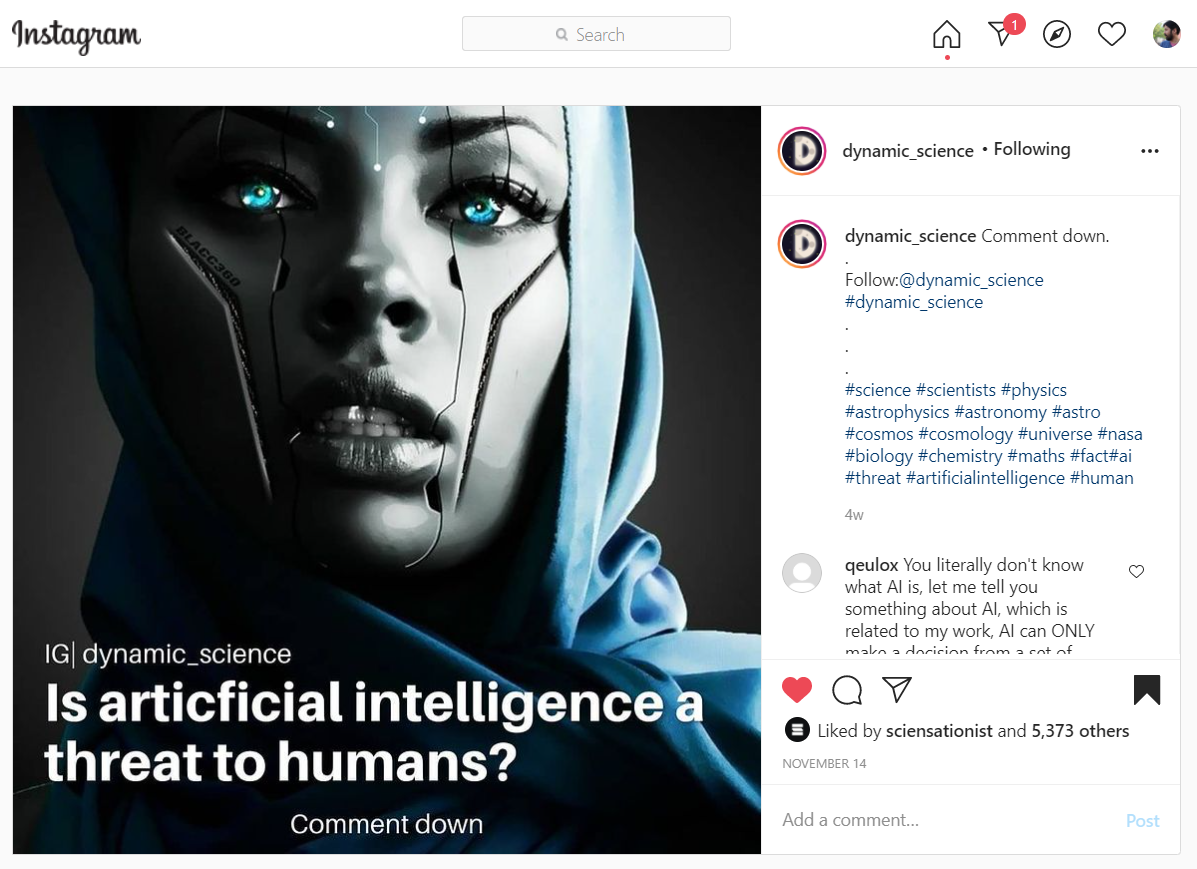

In [1]:
from IPython.display import Image
Image('Insta_post.png')

Fig. 1 - Instagram post on discussion about "Is artificial intelligence a threat to humans" [1]

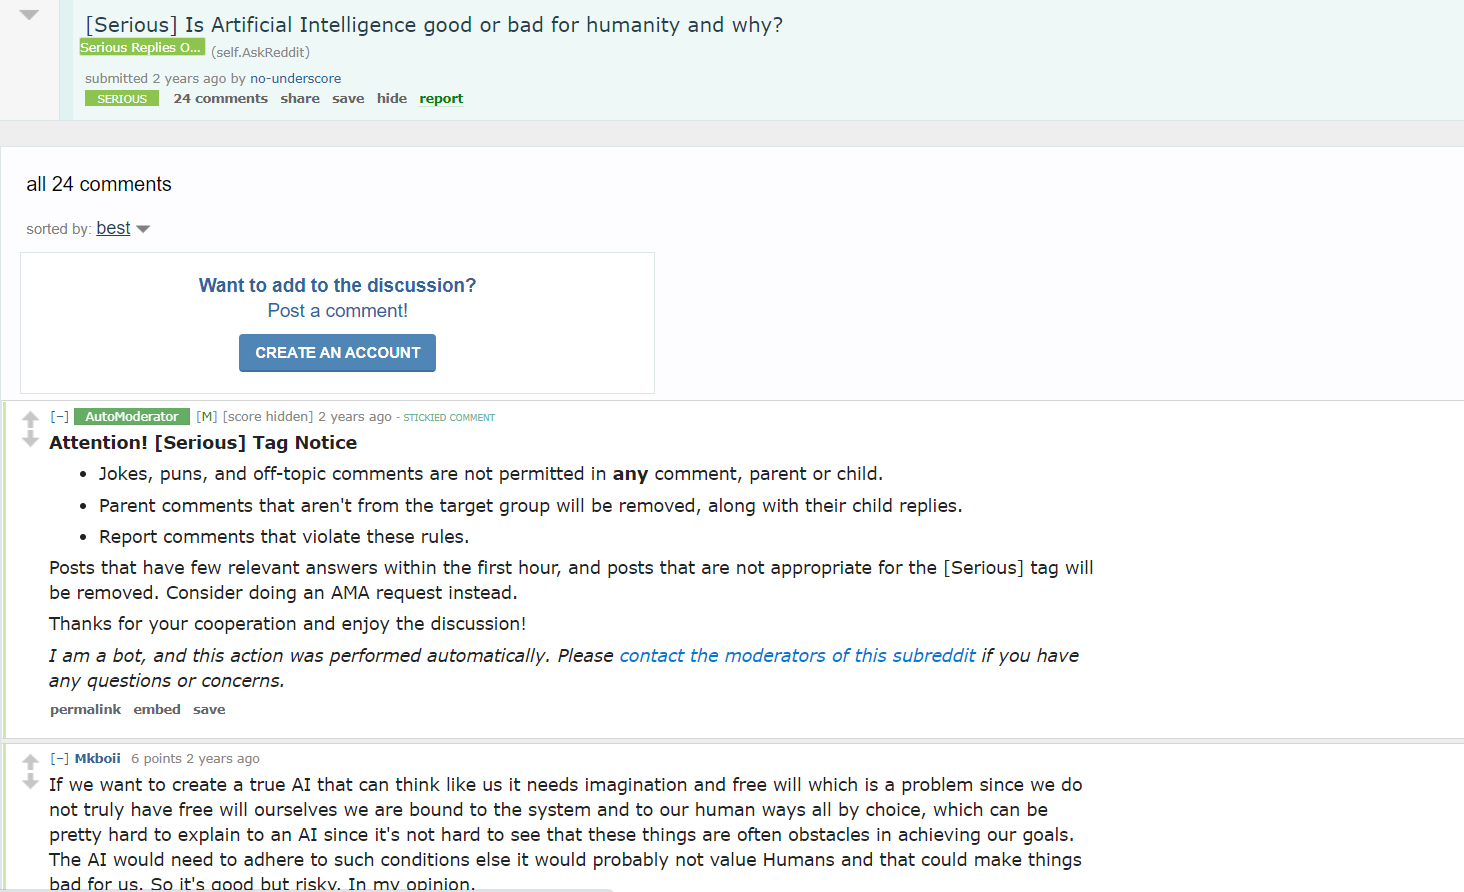

In [2]:
from IPython.display import Image
Image('Reddit_post_1.png')

Fig. 2 - Reddit discussion on "Is Artificial Intelligence good or bad for huamnity?" [2]

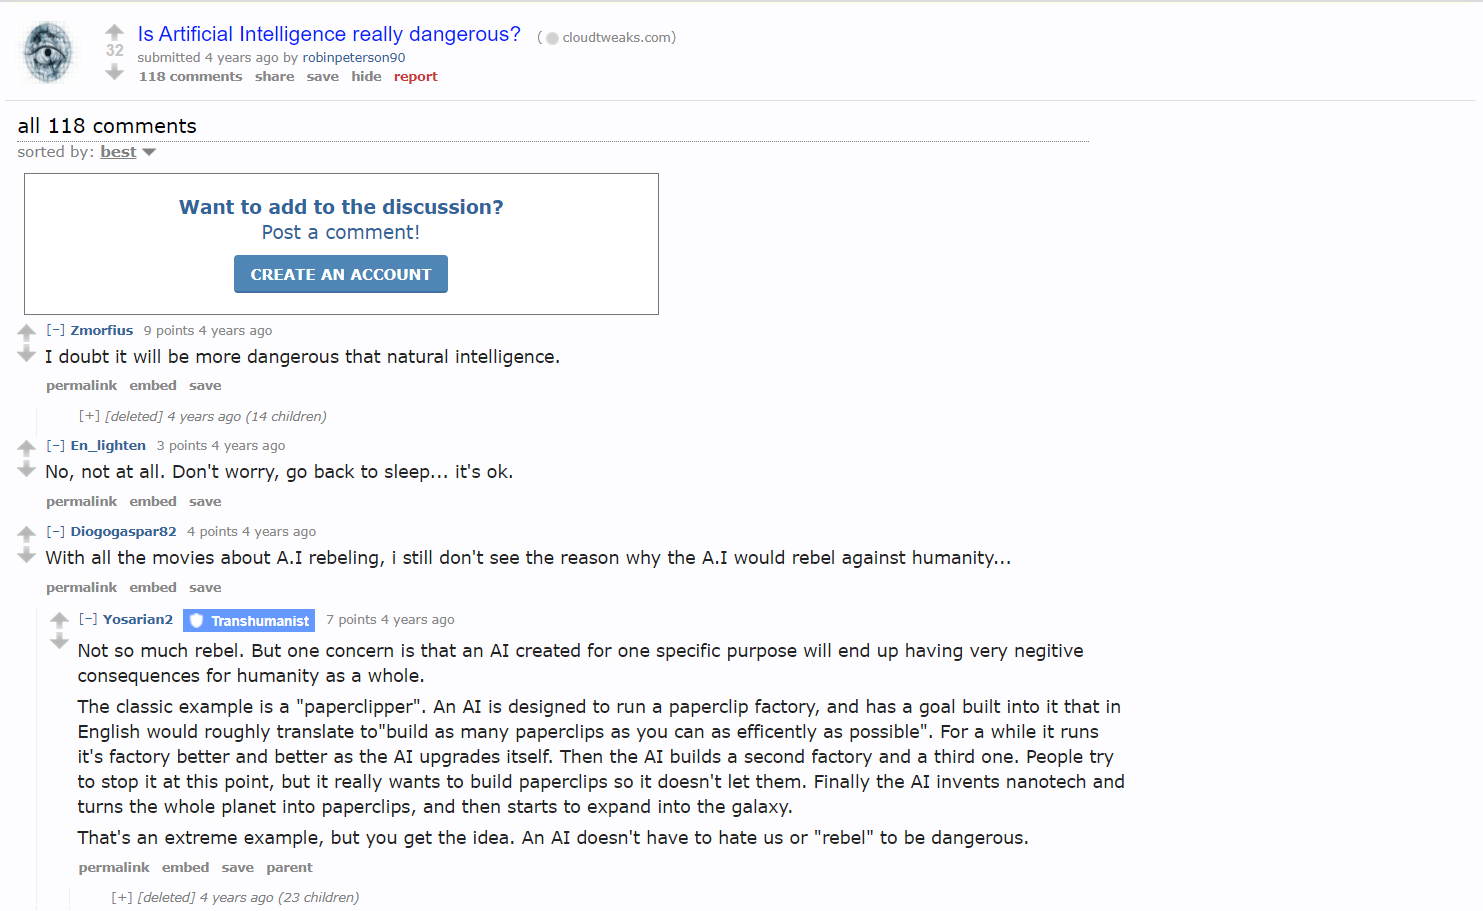

In [3]:
from IPython.display import Image
Image('Reddit_post_2.png')

Fig. 3 - Reddit discussion on "Is Artificial Intelligence really dangerous?" [3]

To gather the identified data, we will need to use scraping tools like Python's requests, BeautifulSoup and Selenium libraries. However, the data gathered by these packages will be in textual form as shown in above figures and to apply analytical machine learning algorithm on a dataset, it needs to be in numerical form. Hence, after gathering the data, we will clean the dataset using numpy, re and nltk packages and then we will transform the textual data set into numerical form using vectorizing techniques like CountVectorizer and TfidfTransformer. 

# PART - B: Obtain Data

After defining the source of data, we need to extract the data using few web-scraping tools. Regarding the Instagram post, the application stores any post data into a json format which can be retrieved by concatenating the string '/?\__a=1' at the end of the URL. However, this json data cannot be obtained directly using requests library as Instagram requires login credentials to display the json data. Hence, we can use Python's Selenium package to automate this process for us.

First, we need to download a browser driver from their website. For this notebook, I have used Microsoft Edge driver which can be downloaded from their official website [4]. After the downloading is complete, we can define a browser object using Selenium and tell the object to visit the Instagram post and retrieve its json data using the object's 'page_source' attribute. The code for this process is shown in the following section

In [4]:
# Importing webdriver package from selenium library
from selenium import webdriver

# Defining the path where browser driver is stored
PATH = 'C:\\Program Files (x86)\\edgedriver.exe'

# Creating an Edge browser object
driver = webdriver.Edge(PATH)

# Telling the driver object to visit the Instagram post
driver.get("https://www.instagram.com/p/CHk3POSDcnC/?__a=1")

# Storing the json data into a variable using page_source attribute
page_data = driver.page_source

# Terminating the browser object
driver.quit()

In [5]:
# Printing the page data retrieved by browser object
print(page_data[:700])

<html><head></head><body><pre style="word-wrap: break-word; white-space: pre-wrap;">{"graphql":{"shortcode_media":{"__typename":"GraphImage","id":"2442319836627192258","shortcode":"CHk3POSDcnC","dimensions":{"height":1080,"width":1080},"gating_info":null,"fact_check_overall_rating":null,"fact_check_information":null,"sensitivity_friction_info":null,"sharing_friction_info":{"should_have_sharing_friction":false,"bloks_app_url":null},"media_overlay_info":null,"media_preview":"ACoq5winhefm49OvP5UrjilV+KBGppyNLHJ1JUfLg859KuafO6KRIrYPG7JO3/ezyP1FVNIMm8hCvY4PPGfmx6HHT1reZlQHd91cAD1J9fXqAPzoA5/WUxcE+qg/zrJxW9rHzPn+78v5jdWJimwQ5/u1ADUzKSBjp9RUXlt/kj/GkM0LJC4yEY7OdyEKwPYgn+VX7m4MjRRdzIGb14Ixn/PasFHK/d


From the above output, we can see that the json data is stored in an HTML tag called 'pre'. We can retrieve that portion of the output string using regular expressions, where we will need to define the start and the end of the string that we want to acquire. Hence, we can use Python's re package and tell it to retrieve the text between 'pre' and 'endpre' tags. After that we can store the string variable into a json object to retrieve the raw comments data.

In [6]:
# Importing regular expression package
import re

# Using search method to retrieve the text between <pre> and </pre> tags
data = re.search(r'<pre style="word-wrap: break-word; white-space: pre-wrap;">(.*?)</pre>', page_data).group(1)

# Importing json package
import json

# Converting the retrieved text object into a json object
data = json.loads(data)

In [7]:
# Printing the json object
print(type(data))

<class 'dict'>


Inside the json object, the comments data is stored into a complex nested structure which can be gathered by using following hierarchy:

graphql ==> shortcode_media ==> edge_media_to_parent_comment ==> edges ==> node ==> text

The following code section extracts the comment text by iterating through the defined hierarchy and stores that data into a list.

In [8]:
# Traversing the json object to gather the raw comments data
raw_insta_comments = data['graphql']['shortcode_media']['edge_media_to_parent_comment']['edges']

# Iterating through the raw comments data to obtain comments text and appending that text into a list
insta_comments = []
for i in raw_insta_comments:
    insta_comments.append(i['node']['text'])

In [9]:
# Printing the length of Instagram comments
print("Total number of comments:", len(insta_comments))
print("")

# Printing the text inside the list object
print(insta_comments)

Total number of comments: 21

['Obviously, basics programs no matter what we put into them will eventually Within seconds contradict with itself and it’s goal. No matter what you program into AI if a human is in the way it will not care. Idc if you have a degree suck my dick, cause the people that say it will do whatever we want it to do are stupid as shit. You are building a computer to think purely by itself with no input. It’s gonna think on how things just are. It’s not gonna give a shit about your morals or ethics because it always think around that, it will always revert back to fact not feelings. You are stupid if you think AI wouldn’t destroy us. Because it would only be a matter of time. It doesn’t matter how you can program it at all, it will always think past that', 'This looks like @evamarcille', 'Ai will take away millions of jobs away &amp; will save the owners of the companies that use them millions on paying medical insurance, hourly/salary wages, lawsuits ect..once the

In the above section, we retrieved 21 comments from the Instagram post. Now, we can start extracting other comments from two Reddit forums. For that, we can use Python's requests and BeautifulSoup packages. In the following code section, I have imported the requests package and used its object to retrieve the HTML text from both the forums using get method.

In [10]:
# Importing requests package
import requests

# Stroing the URL of both forums in two different variables
url_1 = "https://old.reddit.com/r/AskReddit/comments/7tu0j5/serious_is_artificial_intelligence_good_or_bad/"
url_2 = "https://old.reddit.com/r/Futurology/comments/4cw1ev/is_artificial_intelligence_really_dangerous/"

# Retrieving the HTML text using requests' get method
response_1 = requests.get(url_1, headers={'User-Agent': 'Chrome/86.0.4240.75'})
response_2 = requests.get(url_2, headers={'User-Agent': 'Chrome/86.0.4240.75'})

Now, we can inspect the page content to identify where the comment text is stored. In our case, all the comments are stored in a division tag called 'md' and that division tag resides inside another division tag. The ids of those div tags are 'siteTable_t3_7tu0j5' and 'siteTable_t3_4cw1ev' for forum 1 and forum 2 respectively. The analysis of this process is shown in following two diagrams which can be seen by visiting both webpages and press 'F12' to open the page source:

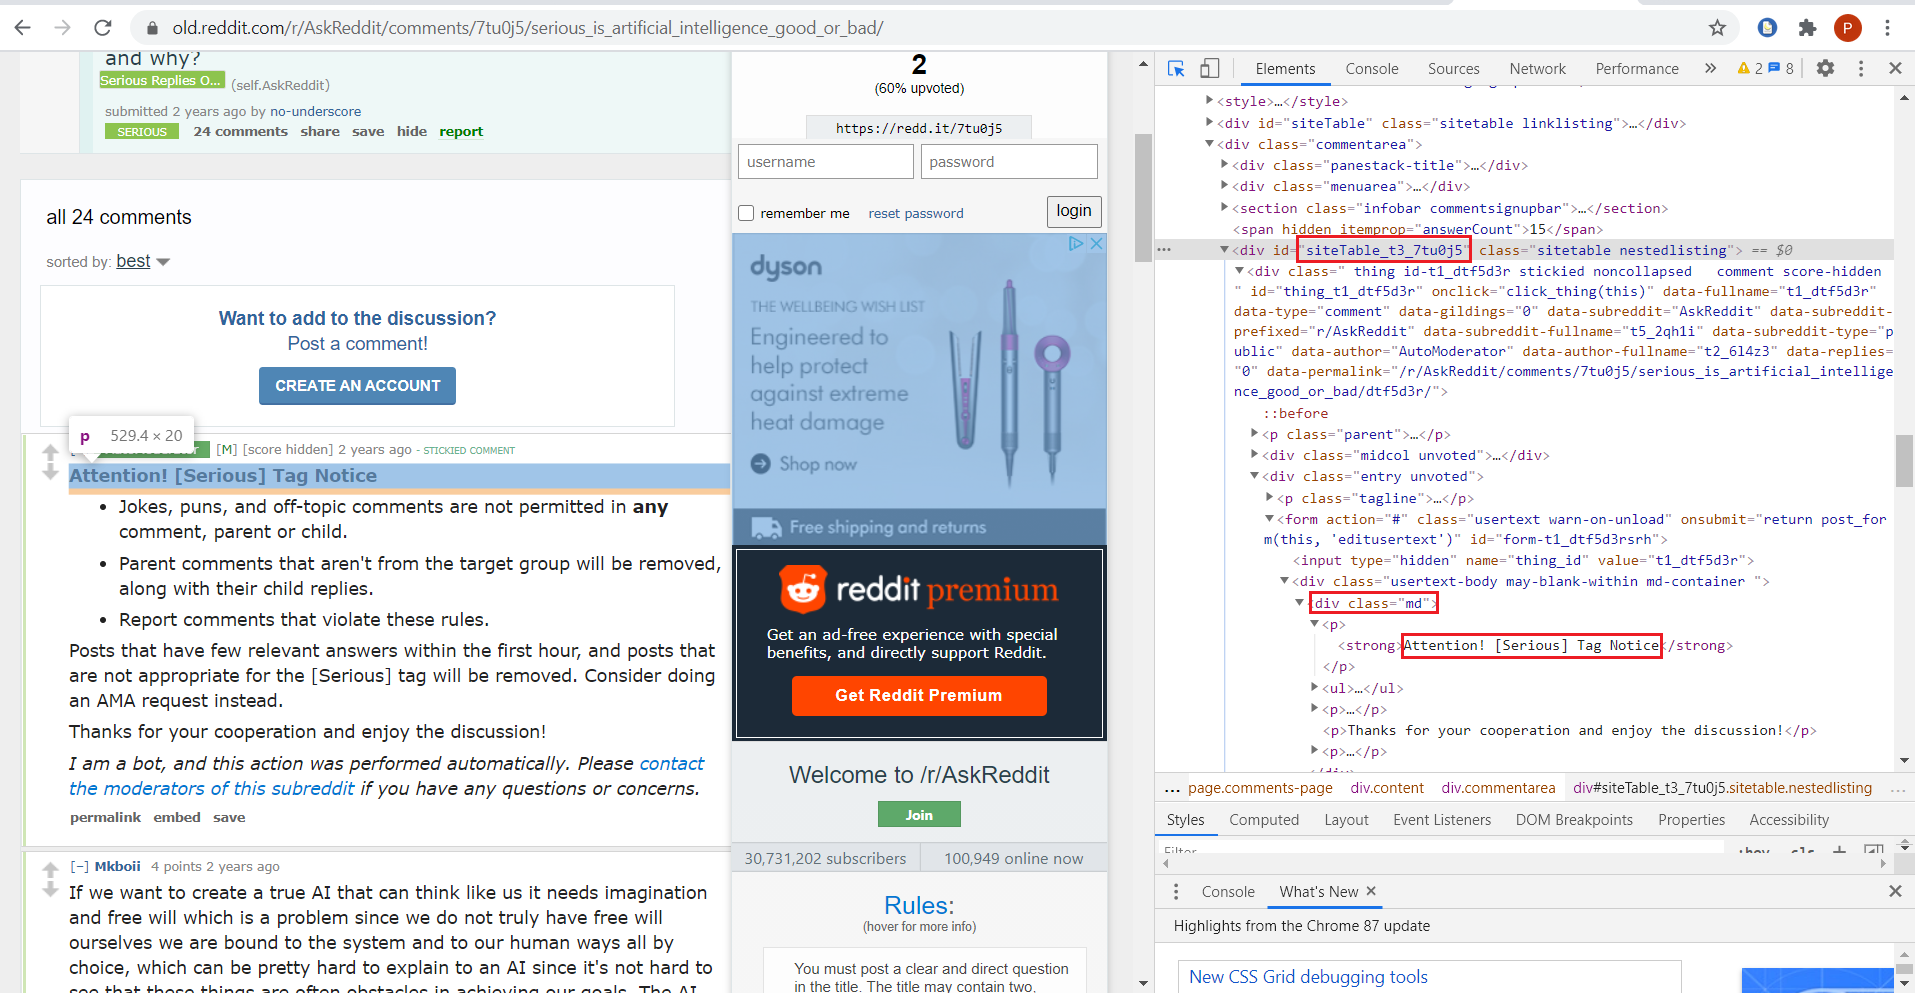

In [11]:
from IPython.display import Image
Image('Reddit_source_2.png')

Fig. 4 Reddit Forum Page Source [2]

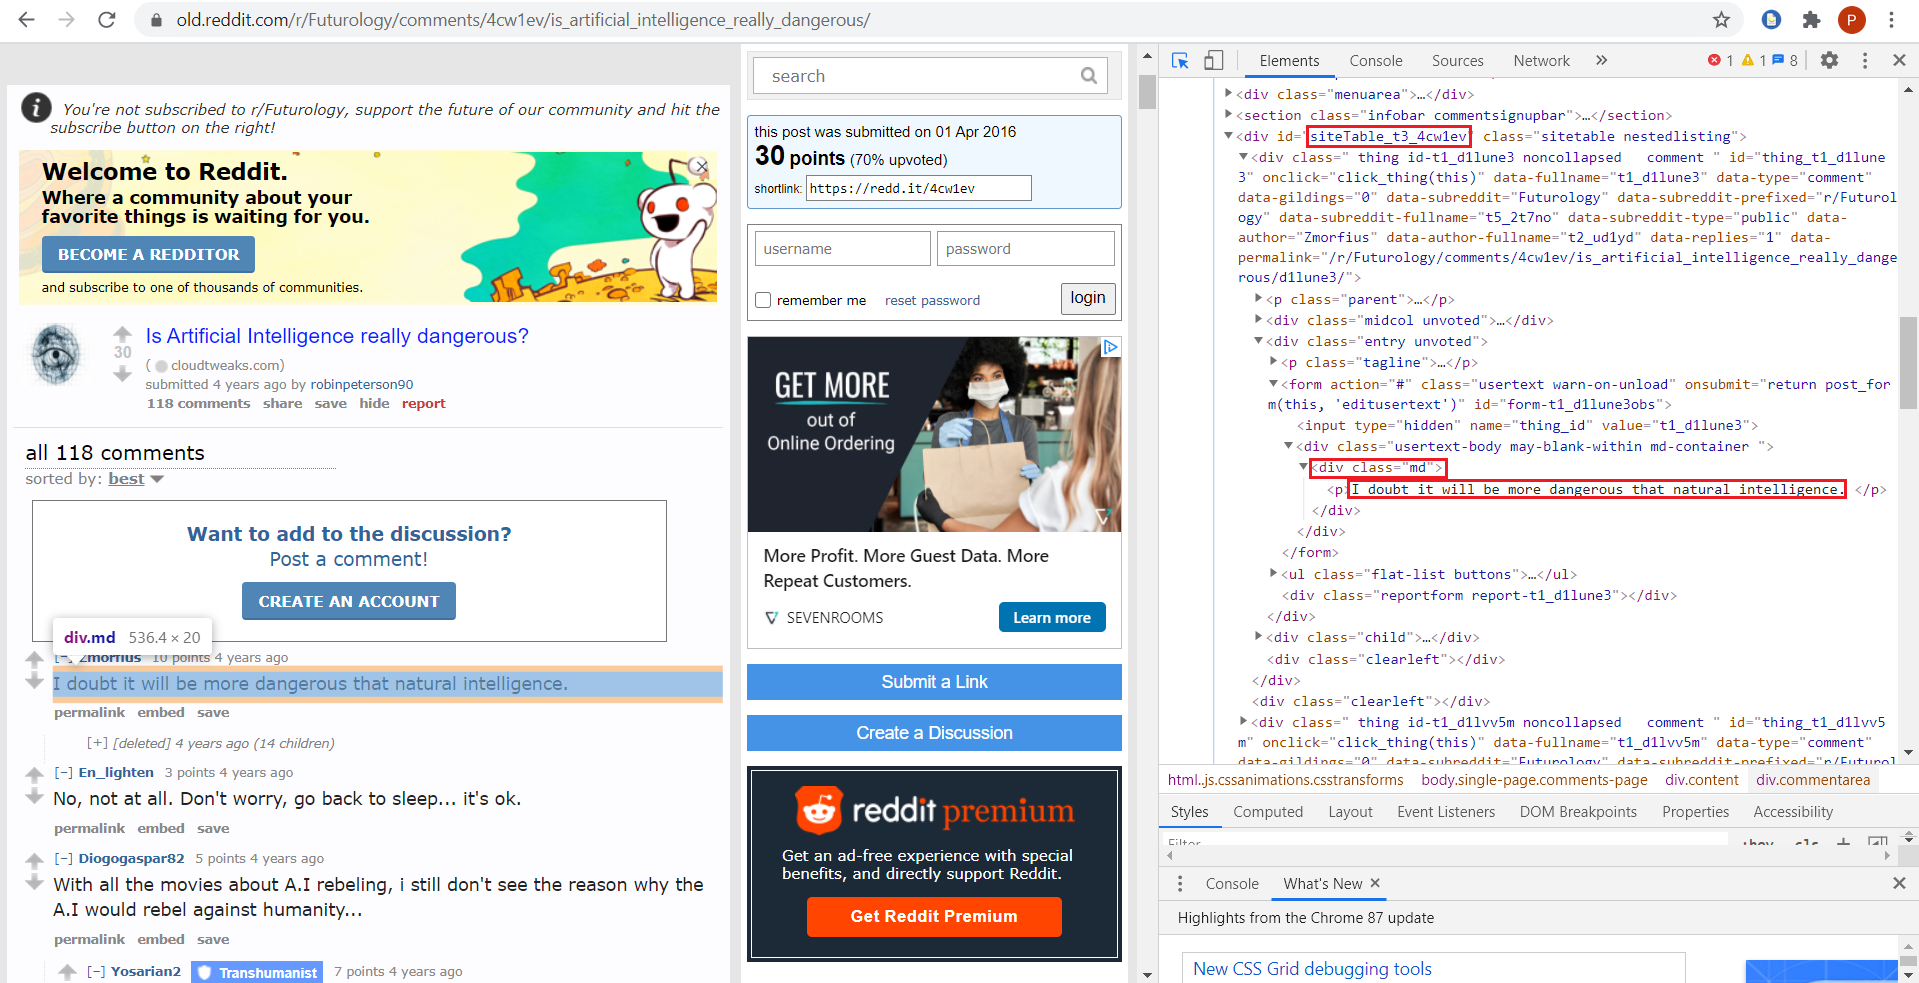

In [12]:
from IPython.display import Image
Image('Reddit_source_1.png')

Fig. 5 Reddit Forum Page Source [3]

Now the targeted division tags can be extracted using BeautifulSoup's find() and find_all() methods. The following code section parses the response object using an HTML parser and stores the comments text into a list

In [13]:
# Importing BeautifulSoup package
from bs4 import BeautifulSoup

# Creating soup objects by parsing response text using an HTML parser
soup_1 = BeautifulSoup(response_1.text, 'html.parser')
soup_2 = BeautifulSoup(response_2.text, 'html.parser')

# Retrieving the division tags using their ids
data_1 = soup_1.find('div', {'id': 'siteTable_t3_7tu0j5'})
data_2 = soup_2.find('div', {'id': 'siteTable_t3_4cw1ev'})

# Retrieving all the division tags with md class
raw_reddit_comments_1 = data_1.find_all('div', class_='md')
raw_reddit_comments_2 = data_2.find_all('div', class_='md')

# Storing comments text into a list
reddit_comments = []
for i in raw_reddit_comments_1:
    reddit_comments.append(i.text)
    
for i in raw_reddit_comments_2:
    reddit_comments.append(i.text)

In [14]:
# Printing the length of Reddit comments
print("Total Length:", len(reddit_comments))
print("")

# Prininting 5 comments inside the list
print(reddit_comments[:5])

Total Length: 127

["Attention! [Serious] Tag Notice\n\nJokes, puns, and off-topic comments are not permitted in any comment, parent or child.\nParent comments that aren't from the target group will be removed, along with their child replies. \nReport comments that violate these rules.\n\nPosts that have few relevant answers within the first hour, and posts that are not appropriate for the [Serious] tag will be removed. Consider doing an AMA request instead.\nThanks for your cooperation and enjoy the discussion!\nI am a bot, and this action was performed automatically. Please contact the moderators of this subreddit if you have any questions or concerns.\n", "If we want to create a true AI that can think like us it needs imagination and free will which is a problem since we do not truly have free will ourselves we are bound to the system and to our human ways all by choice, which can be pretty hard to explain to an AI since it's not hard to see that these things are often obstacles in 

Now, we can combine both lists containing Instagram comments and Reddit comments to create a union list. Hence, in the following section, I have appended both lists using + operator and stored them into another list called 'comments'.

In [15]:
# Concatenating both lists
comments = insta_comments + reddit_comments

# Printing length of the union list
print("Total Length:", len(comments))

Total Length: 148


# PART-C: Scrubbing & Formatting

Before applying any type of data transformation process, we need to delete all the comments that are not related to the topic or comments that do not convey any opinions. In the following section, I have identified the indexes of such comments and removed them using built-in del function.

In [16]:
# Indexes of irrelevant comments
del_comments = [1, 13, 15, 18, 21, 33, 46, 49, 56, 61, 66, 67, 68, 82, 84, 86, 87, 88, 113]

# Deleting irrelevant comments
for i in del_comments:
    del comments[i]
    
# Printing the length of comments list
print("Total Length:", len(comments))

Total Length: 129


In [17]:
# Printing the comments
print(comments[:10])

['Obviously, basics programs no matter what we put into them will eventually Within seconds contradict with itself and it’s goal. No matter what you program into AI if a human is in the way it will not care. Idc if you have a degree suck my dick, cause the people that say it will do whatever we want it to do are stupid as shit. You are building a computer to think purely by itself with no input. It’s gonna think on how things just are. It’s not gonna give a shit about your morals or ethics because it always think around that, it will always revert back to fact not feelings. You are stupid if you think AI wouldn’t destroy us. Because it would only be a matter of time. It doesn’t matter how you can program it at all, it will always think past that', 'Ai will take away millions of jobs away &amp; will save the owners of the companies that use them millions on paying medical insurance, hourly/salary wages, lawsuits ect..once the self-driven truck is 110% perfected &amp; cargo companies fee

By analyzing the remaining comments, we can say that there are several special codes such as '\n' and '&amp;' in the text that needs to be removed. In the following section, I have replaced such characters with blank string.

In [18]:
for i in range(len(comments)):
    if '\n' in comments[i]:
        comments[i] = comments[i].replace('\n', '')
    if '&amp;' in comments[i]:
        comments[i] = comments[i].replace('&amp;', '')

In [19]:
# Printing the comments
print(comments[:10])

['Obviously, basics programs no matter what we put into them will eventually Within seconds contradict with itself and it’s goal. No matter what you program into AI if a human is in the way it will not care. Idc if you have a degree suck my dick, cause the people that say it will do whatever we want it to do are stupid as shit. You are building a computer to think purely by itself with no input. It’s gonna think on how things just are. It’s not gonna give a shit about your morals or ethics because it always think around that, it will always revert back to fact not feelings. You are stupid if you think AI wouldn’t destroy us. Because it would only be a matter of time. It doesn’t matter how you can program it at all, it will always think past that', 'Ai will take away millions of jobs away  will save the owners of the companies that use them millions on paying medical insurance, hourly/salary wages, lawsuits ect..once the self-driven truck is 110% perfected  cargo companies feel secure t

From above codes output, we can say that all '\n' and '&amp;' have been removed. However, we still need to remove other special characters like question marks, comma, period, brackets etc. For that we can use sub() method from regular expression package re. This method allows us to replace any character with a blank space that is not an alphabet or a space. In the following section, I have included the execution code for the mentioned process as well as the semantics to convert every string into lowercase so that we can reduce the amount of redundancy we might have in feature creation phase.

In [20]:
# Interate all the comments and replace all the special charcters with blanck string
# Also convert all the capital letters into lowercase
for i in range(len(comments)):
    comments[i] = re.sub('[^a-zA-Z ]', '', comments[i]).lower()

In [21]:
# Printing the comments
print(comments[:10])

['obviously basics programs no matter what we put into them will eventually within seconds contradict with itself and its goal no matter what you program into ai if a human is in the way it will not care idc if you have a degree suck my dick cause the people that say it will do whatever we want it to do are stupid as shit you are building a computer to think purely by itself with no input its gonna think on how things just are its not gonna give a shit about your morals or ethics because it always think around that it will always revert back to fact not feelings you are stupid if you think ai wouldnt destroy us because it would only be a matter of time it doesnt matter how you can program it at all it will always think past that', 'ai will take away millions of jobs away  will save the owners of the companies that use them millions on paying medical insurance hourlysalary wages lawsuits ectonce the selfdriven truck is  perfected  cargo companies feel secure to use them imagine the unem

After removing punctuation marks, we can start applying stopwords removal and lemmatization. Stopwords are those words that occur frequently in a sentence but do not impact on the meaning of the sentence. For example, articles like 'a', 'an' and 'the'. Removing this type of words is necessary in data analytics to reduce the number of features that might be created. Apart from this, lemmatization is the process of transforming a word to its root. For example, after applying lemmatization, word 'talked' becomes 'talk'. This process may further help us to reduce a greater number of features as both words will have the same meaning. We can also apply stemming instead of lemmatization. However, a stemming algorithm only trims letters at the end of a word. That is the word 'caring' becomes 'car' which are two different words conveying different things. Hence, usually lemmatization is preferred over stemming. Both the processes can be executed using Python's Natural Language Tool Kit (NLTK). In the following code section, I have created a set of stopwords using nltk but I have removed two words 'no' and 'not' from it. The reason behind removing those words is that, in many comments people have answer the question about "Is AI dangerous?" with either yes or no. Hence, these two words are important for us to perform data analytics tasks. Hence, removing them will cause several issues. After that, I have iterated through all the comments in the list and the applied stopwords removal as well as lemmatization on them to create a final corpus of sentences. Where a corpus is defined as a set of sentences/words.

In [22]:
# Importing required nltk methods and classes
import nltk
nltk.download("stopwords")
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Creating an empty list of corpus
corpus = []

# Creating a set of stopwords and removing 'no' and 'not' from it
stopwords = set(stopwords.words('english')) - set(['no', 'not'])

# Iterating every comment to apply stopwords removal and lemmatization on it
for i in range(len(comments)):
    comment = comments[i].split()
    l = WordNetLemmatizer()
    comment = [l.lemmatize(word) for word in comment if not word in stopwords]
    comment = ' '.join(comment)
    corpus.append(comment)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pooja\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pooja\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [23]:
# Printing the corpus
print(corpus[:10])

['obviously basic program no matter put eventually within second contradict goal no matter program ai human way not care idc degree suck dick cause people say whatever want stupid shit building computer think purely no input gonna think thing not gonna give shit moral ethic always think around always revert back fact not feeling stupid think ai wouldnt destroy u would matter time doesnt matter program always think past', 'ai take away million job away save owner company use million paying medical insurance hourlysalary wage lawsuit ectonce selfdriven truck perfected cargo company feel secure use imagine unemployment rate job title', 'think biggest threat humanitywe create object work faster efficiently usand intelligent enough harm u', 'yes lost control', 'yes', 'yesbut maybe thats r', 'dont fuck something seriousno', 'yes', 'depends decision human progress life determined bouth nature nurture ai program nature make sure treat ai properly order make compatible society', 'no bro human t

The next step to create our numerical dataset is to apply vectorizing technique on our string corpus. To apply this process, I have used CountVectorizer from scikit-learn's feature extraction package. This process converts all the words in our corpus into vectors. For example, let's say we have 5 unique words in our corpus and one word out of those is 'dangerous'. So, the equivalent vector representation of this word will be [1, 0, 0, 0, 0] where the first column denotes the word 'dangerous' whereas other columns represent other words from the corpus. In our vector representation, 1 denotes presence of that particular word and absence of other words. This way we can apply CountVectorizer on our corpus sentences to create their equivalent vectors.

In [24]:
# Importing CountVectorizer class from sklearn
from sklearn.feature_extraction.text import CountVectorizer

# Creating an empty object of CountVectorizer
cv = CountVectorizer()

# Fitting our created corpus to the cv object and stroing the resultant vectors in a variable
X_vector = cv.fit_transform(corpus).toarray()

In [25]:
# Importing pickle package
import pickle

# Saving the vectorizer in a pickle file for future use
pickle.dump(cv, open("countvectorizer.pickel", "wb"))

Furthermore, we can apply tf-idf weighting to our vectors for more accurate representation of each individual vectors. Term Frequency and Inverse Document Frequency (tf-idf) is a technique of information retrieval that calculates the frequency of every word in a document to identify the significance of that word for its parent document. Hence, most frequent words will be assigned a larger weight as compared to scarce words. This weighting will help us identify which words are important for separating positive opinions from negative opinions. Tf-idf is also used for comparing the similarity between two document vectors. Hence, it will become easier for us to group similar opinions with each other. In the following code section, I have imported the TfidfTransformer form scikit-learn's feature extraction package and applied it on our vector array.

In [26]:
# Importing tf-idf transformer class
from sklearn.feature_extraction.text import TfidfTransformer

# Creating an empty object of tf-idf class
tfidf_transformer = TfidfTransformer()

# Feeding our vector array to the object and storing the result into a variable
X_tfidf = tfidf_transformer.fit_transform(X_vector)

In [27]:
# Importing scipy's sparse matrix method and pandas package
from scipy.sparse import csr_matrix
import pandas as pd

# Saving the tf-idf vector into a csv file for future use
df = pd.DataFrame(data=csr_matrix.todense(X_tfidf))
df.to_csv('features.csv', index=False)

Now that we have our features, we can also create a label array as well. For this task, I have read all the comments and assigned them two labels: Positive(1) and Negative(0). After assigning those labels, I have stored them into a csv file called labels.csv. We can load that file into this notebook using pandas' read_csv() method.

In [28]:
# Importing the pandas package
import pandas as pd

# Loading the labels file into a variable y
y = pd.read_csv('Labels.csv')
y = y.iloc[:, 0].values

In [29]:
# Displaying the shape of label array
print(y.shape)

(129,)


# PART-D: Exploratory Data Analysis

Since we have created our corpus and the vector array, we can start applying data analysis techniques to understand the behavior of our dataset. First, I have converted our vector array into a panda DataFrame to create the summary of its behavior.

In [30]:
# Converting vector array into a DataFrame
df_vector = pd.DataFrame(X_vector)

# Displaying the summary of dataframe
df_vector.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Columns: 1531 entries, 0 to 1530
dtypes: int64(1531)
memory usage: 1.5 MB


From the above summary, we can say that there are a total of 129 comments instances(vectors) with 1531 columns. Here, each column represents a unique word from our created corpus. Now, we can apply describe method to see the range of our features as well as if there are any null values in the dataset or not.

In [31]:
# Describing the behaviour of dataframe 
df_vector.describe()

,0,1,2,3,4,5,6,7,8,9,...,1521,1522,1523,1524,1525,1526,1527,1528,1529,1530
count,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,...,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000
mean,0.031008,0.062016,0.007752,0.007752,0.007752,0.007752,0.007752,0.007752,0.007752,0.015504,...,0.015504,0.054264,0.054264,0.007752,0.108527,0.007752,0.054264,0.007752,0.062016,0.007752
std,0.174014,0.242124,0.088045,0.088045,0.088045,0.088045,0.088045,0.088045,0.088045,0.176090,...,0.124027,0.227420,0.259509,0.088045,0.379973,0.088045,0.227420,0.088045,0.272487,0.088045
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,...,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000


By analyzing the description of the dataframe, we can say that the range of all the features is between 0 and 1 whereas there are no null values present inside the dataframe because all the columns have 129 instances in them. Additionally, from the values of mean row, it can be deduced that every feature's mean is centered around zero. Meaning that, there are more zeros present in the feature than ones. This type of matrix is usually referred to as a sparse matrix.

In [32]:
# Displaying first 5 rows of the dataframe
df_vector.head(5)

,0,1,2,3,4,5,6,7,8,9,...,1521,1522,1523,1524,1525,1526,1527,1528,1529,1530
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [33]:
# Displaying last 5 rows of the dataframe
df_vector.tail(5)

,0,1,2,3,4,5,6,7,8,9,...,1521,1522,1523,1524,1525,1526,1527,1528,1529,1530
124,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
125,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
126,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
127,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
128,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


From these outputs, we can confirm our initial assumption that the vectorizer has created a sparse matrix where there are more zeros than ones. Now, we can apply the same techniques on the tfidf vector array as well.

In [34]:
# Displaying the shape of tfidf vector array
print(X_tfidf.shape)

(129, 1531)


In [35]:
# Converting tf-idf vector array into a DataFrame
df_tfidf = pd.DataFrame(X_tfidf)

# Displaying the summary of dataframe
df_tfidf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       129 non-null    object
dtypes: object(1)
memory usage: 1.1+ KB


In the above summary, we can see that the TFidfTransformer class has calculated the tfidf score for each vector calculated by CountVectorizer class. Now, we can display the tf-idf value of each vector using the following code:

In [36]:
# Fetching the tf-idf values of each vector and converting them into a DataFrame object with feature names as indexes
tfidf = pd.DataFrame(X_tfidf[0].T.todense(), index=cv.get_feature_names(), columns=["Tf-Idf"])

# Sorting the tf-idf score in descending oreder
tfidf = tfidf.sort_values('Tf-Idf', ascending=False)

# Displaying 20 most frequent words from the documents
print (tfidf.head(20))

              Tf-Idf
matter      0.391482
think       0.308767
always      0.293611
gonna       0.248502
program     0.243678
shit        0.215213
stupid      0.204497
no          0.180112
not         0.146878
contradict  0.124251
purely      0.124251
ethic       0.124251
degree      0.124251
dick        0.124251
suck        0.124251
idc         0.124251
revert      0.124251
within      0.114515
feeling     0.114515
obviously   0.114515


We can also analyze the first 5 rows of tfidf vector array as follows:

In [37]:
# Dispalying the first 5 rows from tfidf vector array
X_tfidf[:5, :]

<5x1531 sparse matrix of type '<class 'numpy.float64'>'
	with 92 stored elements in Compressed Sparse Row format>

In [38]:
print("Index\t\t\tValue")
print("")
print(X_tfidf[:5, :])

Index			Value

  (0, 1517)	0.0941688138984256
  (0, 1515)	0.05114381939596091
  (0, 1500)	0.11451472885586989
  (0, 1488)	0.10224842300862425
  (0, 1478)	0.07431802383568865
  (0, 1469)	0.07431802383568865
  (0, 1383)	0.07586776841068874
  (0, 1370)	0.3087670982999944
  (0, 1369)	0.05922342850615956
  (0, 1317)	0.12425104354927621
  (0, 1313)	0.2044968460172485
  (0, 1225)	0.2152134072894941
  (0, 1193)	0.10760670364474705
  (0, 1183)	0.0941688138984256
  (0, 1151)	0.12425104354927621
  (0, 1081)	0.10760670364474705
  (0, 1078)	0.12425104354927621
  (0, 1064)	0.24367814714043462
  (0, 990)	0.07586776841068874
  (0, 985)	0.10224842300862425
  (0, 943)	0.11451472885586989
  (0, 930)	0.14687802232039912
  (0, 925)	0.18011248956347745
  (0, 886)	0.10224842300862425
  (0, 853)	0.39148155580536287
  :	:
  (1, 677)	0.13991834616302723
  (1, 647)	0.17002707729759947
  (1, 519)	0.13991834616302723
  (1, 420)	0.17002707729759947
  (1, 234)	0.34005415459519894
  (1, 194)	0.17002707729759947
  (1,

The first output says that we have a sparse matrix of size 5x1531 where 92 elements are non-zero. Whereas the second output displayed those 92 non-zero element values with their indexes. From this analysis, we can say that the TfidfTransfomer has created a sparse matrix similar to CountVectorizer but rather than having only zeros and ones in the matrix, TfidfTransofmer has replaced those ones with features' tfidf values.

To understand the significance of applying TfidfTransformer, we can visulaize the datasets using matplotlib library. However, for both vector representations, we have metrices of size 129x1531. That means we need to represent the dataset into a 1531-dimensional graph which is not feasible. Hence, we can apply dimensionality reduction techniques like Principal Component Analysis (PCA) on it to reduce the dimensionality of the dataset from 129x1531 to 129x3. In the following code section, I have used a kernel PCF class from scikit-learn library.

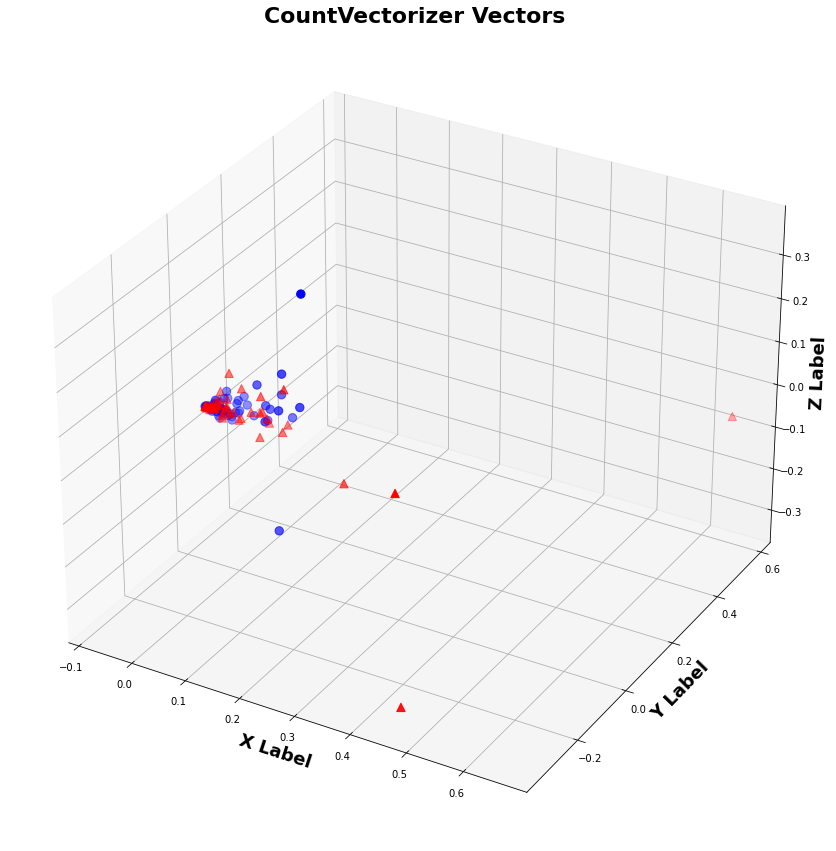

In [39]:
# Importing the libaraies for PCA and graph
import matplotlib.pyplot as plt
from sklearn.decomposition import KernelPCA
from mpl_toolkits.mplot3d import Axes3D

# Creaing a Kernel PCA object that will convert 1531 features into equivalent 3 features
kpca = KernelPCA(n_components=3, kernel='rbf')
X_plot = kpca.fit_transform(X_vector)

# Creating a 3-D graph using matplotlib and Axes3D
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_plot[y==0][:,0], X_plot[y==0][:,1], X_plot[y==0][:,2], c='blue', marker='o', s=70)
ax.scatter(X_plot[y==1][:,0], X_plot[y==1][:,1], X_plot[y==1][:,2], c='red', marker='^', s=70)
ax.set_xlabel('X Label', weight='bold', fontsize=18)
ax.set_ylabel('Y Label', weight='bold', fontsize=18)
ax.set_zlabel('Z Label', weight='bold', fontsize=18)
ax.set_title("CountVectorizer Vectors", weight='bold', fontsize=22)
plt.show()

From the above diagram, we can say that both the negative labels (Blue) and positive labels (Red) are cluttered at a single place. Hence, it will become difficult for the machine learning algorithm to separate those datapoints. From this we can deduce that, feeding the CountVectorizer array directly to the algorithm will cause several errors.

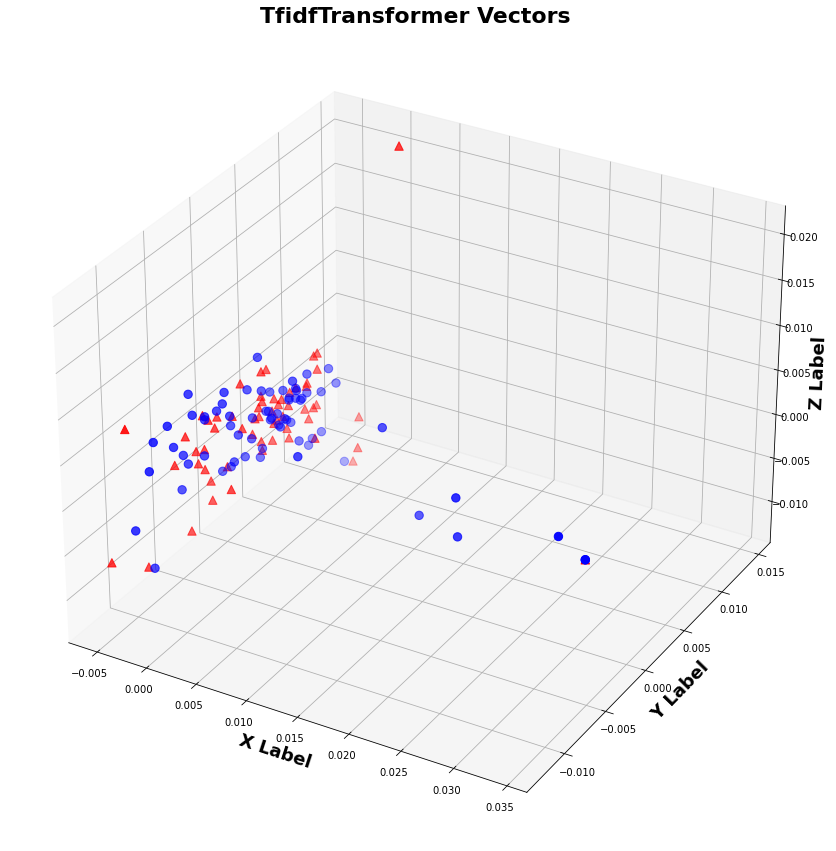

In [40]:
# Creaing a Kernel PCA object that will convert 1531 features into equivalent 3 features
kpca = KernelPCA(n_components=3, kernel='rbf')
X_plot = kpca.fit_transform(X_tfidf)

# Creating a 3-D graph using matplotlib and Axes3D
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_plot[y==0][:,0], X_plot[y==0][:,1], X_plot[y==0][:,2], c='blue', marker='o', s=70)
ax.scatter(X_plot[y==1][:,0], X_plot[y==1][:,1], X_plot[y==1][:,2], c='red', marker='^', s=70)
ax.set_xlabel('X Label', weight='bold', fontsize=18)
ax.set_ylabel('Y Label', weight='bold', fontsize=18)
ax.set_zlabel('Z Label', weight='bold', fontsize=18)
ax.set_title("TfidfTransformer Vectors", weight='bold', fontsize=22)
plt.show()

After applying the TfidfTransformer, the vector array has become less cluttered and from the diagram, we can say that the positive labels (red) are residing in X<-0.005 region with three exceptions. Whereas almost every negative labels (blue) are residing in the region X>-0.005. Therefore, it will become easier for the machine learning algorithm to create a decision boundary.

# PART-E: Report Initial Findings

In this notebook, we scraped comments from several social media platforms using Python's scraping tools and applied Natural Language Processing techniques on them to make them more analyzable. Furthermore, we compared two different vectorization techniques CountVectorizer and TfidfTransformer to convert those text comments into numerical form. From those data analysis procedures, we can conclude that after applying TfidfTransformer on the dataset, we can easily identify the regions where positive and negative opinions are residing. Since we have a set of features and labels, we will need to apply a supervised learning algorithm on our dataset to identify whether the opinion is positive or negative. At last, classification techniques like Naive Bayes and Support Vector Machine can be applied on the created dataset to achieve the opinion classification goal.

# REFERENCES

[1] Is Artificial Intelligence a threat to humaity?. (2020). Retrieved 15 December 2020, from https://www.instagram.com/p/CHk3POSDcnC/

[2] [Serious] Is Artificial Intelligence good or bad for humanity and why?. (2018). Retrieved 15 December 2020, from https://old.reddit.com/r/AskReddit/comments/7tu0j5/serious_is_artificial_intelligence_good_or_bad/

[3] Peterson, R. (2016). Is Artificial Intelligence really dangerous?. Retrieved 15 December 2020, from https://old.reddit.com/r/Futurology/comments/4cw1ev/is_artificial_intelligence_really_dangerous/

[4] WebDriver - Microsoft Edge Developer. (2020). Retrieved 15 December 2020, from https://developer.microsoft.com/en-us/microsoft-edge/tools/webdriver/